In [41]:
import importlib
import extractor 
importlib.reload(extractor)
import futils
from extractor import extract_ligands
importlib.reload(futils)
from futils import ROOT

import os
import glob
import gzip
import re
import pandas as pd
import numpy as np
import rdkit.Chem as Chem
from pathlib import Path
import polars
import matplotlib.pyplot as plt
plt.rc("axes", labelsize = 20)
plt.rc("xtick", labelsize = 13)
plt.rc("ytick", labelsize = 13)

In [5]:
df = pd.read_parquet("/home/qzj517/POR-DD/compare/df.parquet")

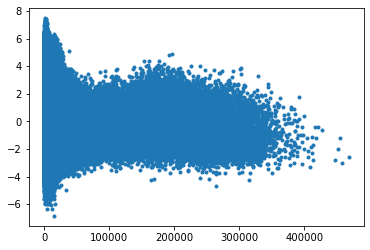

In [6]:
plt.plot(df["diffs"], df["gnina_VS"]-df["equibind_VS"], ".")

In [7]:
import importlib
import futils.comparison as cmp
importlib.reload(cmp)
from scipy.stats import linregress


In [29]:
df["rmsd"] = np.sqrt(df["diffs"]/df["lens"])

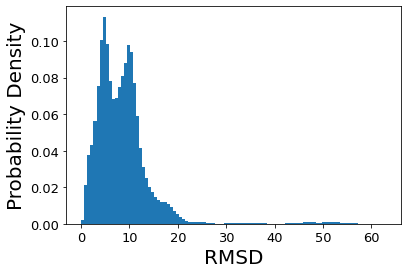

In [52]:
plt.hist(df["rmsd"], bins = 100, density = True)
plt.xlabel("RMSD")
plt.ylabel("Probability Density")
plt.savefig("Figures/RMSD_hist.png", bbox_inches="tight")
pass

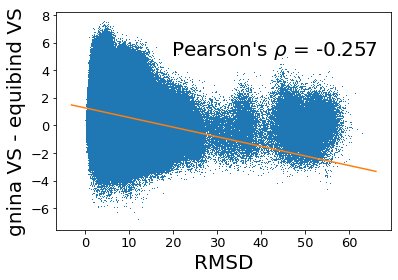

In [53]:
cmp.Linreg(df["rmsd"], (df["gnina_VS"]-df["equibind_VS"]), corpos = (0.65, 0.8))
plt.xlabel("RMSD")
plt.ylabel("gnina VS - equibind VS")
plt.savefig("Figures/RMSD_vs_difference_in_VS.png", bbox_inches="tight")

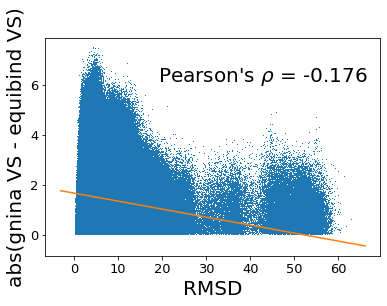

In [54]:
cmp.Linreg(df["rmsd"], (df["gnina_VS"]-df["equibind_VS"]).abs(), corpos = (0.65, 0.8))
plt.xlabel("RMSD")
plt.ylabel("abs(gnina VS - equibind VS)")
plt.savefig("Figures/RMSD_vs_difference_in_abs_VS.png", bbox_inches="tight")

In [488]:
w = extract_ligands(ROOT / "data/gnina_LIT-PCBA_VS_data/lit-pcba")
idk = w[1]
# idk = [m for m in idk if not "inactive" in m.group(0)]

In [257]:
df = pd.DataFrame(idk).astype({"idx": float}).astype({"idx": "Int64"}).sort_values(["activity", "idx", "protein"]).reset_index(drop = True)

In [264]:
df

,file,prefix,activity,idx,protein
0,AID492947_active-lig_3p0g-rec_docked.sdf.gz,AID492947,active,<NA>,3p0g
1,AID492947_active-lig_3pds-rec_docked.sdf.gz,AID492947,active,<NA>,3pds
2,AID492947_active-lig_3sn6-rec_docked.sdf.gz,AID492947,active,<NA>,3sn6
3,AID492947_active-lig_4lde-rec_docked.sdf.gz,AID492947,active,<NA>,4lde
4,AID492947_active-lig_4ldl-rec_docked.sdf.gz,AID492947,active,<NA>,4ldl
...,...,...,...,...,...
2507,AID492947_inactive_312000-lig_4lde-rec_docked....,AID492947,inactive,312000,4lde
2508,AID492947_inactive_312000-lig_4ldl-rec_docked....,AID492947,inactive,312000,4ldl
2509,AID492947_inactive_312000-lig_4ldo-rec_docked....,AID492947,inactive,312000,4ldo
2510,AID492947_inactive_312000-lig_4qkx-rec_docked....,AID492947,inactive,312000,4qkx


In [259]:
_, _, files = next(os.walk("/home/qzj517/POR-DD/data/gnina_LIT-PCBA_VS_data/lit-pcba/ADRB2"))

In [260]:
files = [file for file in files if "active" in file]

In [261]:
files.sort(key = extractor.natural_key)

In [193]:
files == list(df.file)

False

In [185]:
list(df.file) == 

['AID492947_inactive_0-lig_3p0g-rec_docked.sdf.gz',
 'AID492947_inactive_0-lig_3pds-rec_docked.sdf.gz',
 'AID492947_inactive_0-lig_3sn6-rec_docked.sdf.gz',
 'AID492947_inactive_0-lig_4lde-rec_docked.sdf.gz',
 'AID492947_inactive_0-lig_4ldl-rec_docked.sdf.gz',
 'AID492947_inactive_0-lig_4ldo-rec_docked.sdf.gz',
 'AID492947_inactive_0-lig_4qkx-rec_docked.sdf.gz',
 'AID492947_inactive_0-lig_6mxt-rec_docked.sdf.gz',
 'AID492947_inactive_1000-lig_3p0g-rec_docked.sdf.gz',
 'AID492947_inactive_1000-lig_3pds-rec_docked.sdf.gz',
 'AID492947_inactive_1000-lig_3sn6-rec_docked.sdf.gz',
 'AID492947_inactive_1000-lig_4lde-rec_docked.sdf.gz',
 'AID492947_inactive_1000-lig_4ldl-rec_docked.sdf.gz',
 'AID492947_inactive_1000-lig_4ldo-rec_docked.sdf.gz',
 'AID492947_inactive_1000-lig_4qkx-rec_docked.sdf.gz',
 'AID492947_inactive_1000-lig_6mxt-rec_docked.sdf.gz',
 'AID492947_inactive_10000-lig_3p0g-rec_docked.sdf.gz',
 'AID492947_inactive_10000-lig_3pds-rec_docked.sdf.gz',
 'AID492947_inactive_10000-lig_3

In [94]:
idk[0]

IndexError: list index out of range

In [68]:
res = []
for file in idk:
    res.append(re.search(r"_(\d+)-", file))

In [ ]:
res.

In [69]:
res[1000].groups()

('124000',)

In [65]:
res[1000].group(1)

'124000'

In [45]:
idk

['AID492947_active-lig_3p0g-rec_docked.sdf.gz',
 'AID492947_active-lig_3pds-rec_docked.sdf.gz',
 'AID492947_active-lig_3sn6-rec_docked.sdf.gz',
 'AID492947_active-lig_4lde-rec_docked.sdf.gz',
 'AID492947_active-lig_4ldl-rec_docked.sdf.gz',
 'AID492947_active-lig_4ldo-rec_docked.sdf.gz',
 'AID492947_active-lig_4qkx-rec_docked.sdf.gz',
 'AID492947_active-lig_6mxt-rec_docked.sdf.gz',
 'AID492947_inactive_0-lig_3p0g-rec_docked.sdf.gz',
 'AID492947_inactive_0-lig_3pds-rec_docked.sdf.gz',
 'AID492947_inactive_0-lig_3sn6-rec_docked.sdf.gz',
 'AID492947_inactive_0-lig_4lde-rec_docked.sdf.gz',
 'AID492947_inactive_0-lig_4ldl-rec_docked.sdf.gz',
 'AID492947_inactive_0-lig_4ldo-rec_docked.sdf.gz',
 'AID492947_inactive_0-lig_4qkx-rec_docked.sdf.gz',
 'AID492947_inactive_0-lig_6mxt-rec_docked.sdf.gz',
 'AID492947_inactive_1000-lig_3p0g-rec_docked.sdf.gz',
 'AID492947_inactive_1000-lig_3pds-rec_docked.sdf.gz',
 'AID492947_inactive_1000-lig_3sn6-rec_docked.sdf.gz',
 'AID492947_inactive_1000-lig_4lde-

In [ ]:
[file.replace("_protein.pdb", "") for file in files if file.endswith("_protein.pdb")]

['6mxt', '4lde', '4ldl', '4ldo', '3pds', '4qkx', '3sn6', '3p0g']

In [ ]:
with gzip.open(ROOT / "data/gnina_LIT-PCBA_VS_data/lit-pcba/ADRB2/AID492947-lig_4ldl-rec_docked.sdf.gz") as file:
    dat = file.read(10000000)
with open("tmp.txt", "wb") as f:
    f.write(dat)

852502


 23 24  0  0  0  0  0  0  0  0999 V2000
   -0.6004  -13.2397  -50.4564 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8672  -12.7584  -49.2161 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1254  -12.3634  -48.8888 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1174  -12.4519  -49.8116 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8623  -12.9358  -51.0554 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6010  -13.3276  -51.3708 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9269  -13.0247  -52.0178 N   0  0  0  0  0  0  0  0  0  0  0  0
   -4.2132  -14.1484  -52.6585 N   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2524  -13.9002  -53.4782 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.8281  -14.9030  -54.4206 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.6302  -12.5762  -53.3782 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.7706  -12.0490  -52.4351 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.7753  -10.6224  -51.9761 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7303  -13.6583  -50.7858 N   0  0  

In [102]:
with gzip.open(ROOT / "data/gnina_LIT-PCBA_VS_data/lit-pcba/ADRB2/newdefault.summary.gz", "rt") as file:
    dat = file.read()
print(dat)

In [87]:
curdir

'/home/qzj517/POR-DD/data/gnina_LIT-PCBA_VS_data/lit-pcba/ADRB2'

In [80]:
%timeit [file for file in files if file.endswith("_protein.pdb")]

364 µs ± 8.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [76]:
_, _, files = next(w)

In [77]:
files

['AID588795_inactive_235000-lig_5fv7-rec_docked.sdf.gz',
 'AID588795_inactive_260000-lig_5fv7-rec_docked.sdf.gz',
 'AID588795_inactive_11000-lig_5fv7-rec_docked.sdf.gz',
 'AID588795_inactive_84000-lig_5fv7-rec_docked.sdf.gz',
 'AID588795_inactive_350000-lig_5fv7-rec_docked.sdf.gz',
 'AID588795_inactive_343000-lig_5fv7-rec_docked.sdf.gz',
 'AID588795_inactive_325000-lig_5fv7-rec_docked.sdf.gz',
 'AID588795_inactive_117000-lig_5fv7-rec_docked.sdf.gz',
 'AID588795_inactive_44000-lig_5fv7-rec_docked.sdf.gz',
 'AID588795_inactive_125000-lig_5fv7-rec_docked.sdf.gz',
 'AID588795_inactive_151000-lig_5fv7-rec_docked.sdf.gz',
 'AID588795_inactive_23000-lig_5fv7-rec_docked.sdf.gz',
 'AID588795_inactive_282000-lig_5fv7-rec_docked.sdf.gz',
 'AID588795_inactive_270000-lig_5fv7-rec_docked.sdf.gz',
 'AID588795-lig_5fv7-rec_docked.sdf.gz',
 'AID588795_inactive_173000-lig_5fv7-rec_docked.sdf.gz',
 'AID588795_inactive_92000-lig_5fv7-rec_docked.sdf.gz',
 'AID588795_inactive_82000-lig_5fv7-rec_docked.sdf.g